# Biodiversity Project

This project is part of the Codecademy course "Data Scientist: Natural Language Processing Career Path".

For this project, data from National Parks Service about endangered species in different parks will be interpreted in order to check any patterns to endangered species.

### Goals

The aim of the project is to investigate any patterns or themes to the types of species that become endangered and then assess the likeliness of becoming extinct.

### Resources

Data from National Parks Service:

- observations.csv

- species_info.csv

For classification status:

- nps.gov

- fisheries.noaa.gov

- wikipedia.org

- maine.gov

### Analysis


Some analysis of the data will intend to answer the following questions:

- What is the distribution of `conservation_status` for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?



## 1. Importing Python Libraries

This project will be using Seaborn and Matplotlib libraries to plot data. Also, this project will be using Pandas and Numpy for data manipulation.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the data


In [2]:
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

## 3. Diagnosing the \'tideness\' of the data

### 3.1 Inspecting the `species` dataset

In the `species` dataset there are four columns: `category`,`scientific_name`,`common_names`, and `conservation_status`.

The first five entries of the `conservation_status` columns have no data.

In [3]:
print(species.columns)
print(species.head(10))


Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                  

As seen below, most entries in the conservation status columns (about 97%) have missing data.

In [4]:
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [5]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


### 3.1.1 Handling missing data

Since there are 191 non-null values in the `conservation_status` column, it is crucial to tackle missing data. 

In [6]:
species.conservation_status.isna().value_counts()

True     5633
False     191
Name: conservation_status, dtype: int64

In [7]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

#### Some findings

Despite the fact that there are 5824 rows, most of them have missing data for the `conservation_status` column.


In [8]:
# getting to know species that have a value for the conservation_status column
species_conservation = species[species.conservation_status.notna()]
species_conservation = species_conservation.rename(columns={'scientific_name': 'scientific', 'common_names': 'nicknames',\
                                     'conservation_status': 'status'})
species_conservation.head()
species_conservation.scientific.duplicated().value_counts()
species_conservation.scientific[species_conservation.duplicated(subset=['scientific'], keep=False)].head(13)

8                     Canis lupus
29               Eptesicus fuscus
30      Lasionycteris noctivagans
37               Myotis lucifugus
104             Pandion haliaetus
172                   Gavia immer
226               Riparia riparia
337         Nycticorax nycticorax
3020                  Canis lupus
3029                Taxidea taxus
3035             Eptesicus fuscus
3037    Lasionycteris noctivagans
3039          Myotis californicus
Name: scientific, dtype: object

In [9]:
# getting to know species that have no value for the conservation_status column
species_nan = species[species.conservation_status.isna()]
species_nan = species_nan.rename(columns={'scientific_name': 'scientific', 'common_names': 'nicknames',\
                                     'conservation_status': 'status'})
species_nan.head()
species_nan.duplicated().value_counts()

False    5633
dtype: int64

#### Some analysis

Provided that the number of missing data is too high, listwise deletion is not an option in that it would reduce the sample size too much. Although, that will be required to assess the distribution of conservation status for animals.

On the other hand, in spite of the `conservation_status` value is missing, information in other columns (category, scientific name, and common names) is important to analyse the `observation` dataset.

### 3.1.2 Checking duplicated data

Since each species has its own unique scientific name, the expected unique number should be the same of the number of rows (5824). However, there are 5541 unique values in the `scientific name`  column, which suggests there might be some duplicated entries. 

In [10]:
species1 = species.rename(columns={'scientific_name': 'scientific',  
                        'common_names': 'nicknames', 'conservation_status':'status'})
# checking duplicated rows
print(species1.duplicated().unique())

#checking duplicated values in the scientific column
print(species1[species1.duplicated(subset = ['scientific'])].sort_values(by='scientific'))
species1[species1.duplicated(subset=['scientific'])].nunique()


[False]
            category            scientific  \
5553  Vascular Plant   Agrostis capillaris   
5554  Vascular Plant     Agrostis gigantea   
4178  Vascular Plant    Agrostis mertensii   
5556  Vascular Plant       Agrostis scabra   
4182  Vascular Plant  Agrostis stolonifera   
...              ...                   ...   
3231            Bird      Vireo solitarius   
5640  Vascular Plant      Vulpia bromoides   
5643  Vascular Plant         Vulpia myuros   
4290  Vascular Plant      Vulpia octoflora   
3347  Vascular Plant          Zizia aptera   

                                              nicknames status  
5553                  Colonial Bent, Colonial Bentgrass    NaN  
5554                Black Bent, Redtop, Water Bentgrass    NaN  
4178               Arctic Bentgrass, Northern Bentgrass    NaN  
5556           Rough Bent, Rough Bentgrass, Ticklegrass    NaN  
4182  Carpet Bentgrass, Creeping Bent, Creeping Bent...    NaN  
...                                              

category        6
scientific    274
nicknames     282
status          4
dtype: int64

#### Some findings
Unexpectadly, among rows with duplicated values in the scientific name column, there are 274 unique values for 283 rows. So, 9 values are not unique.

In [11]:
# Getting to know duplicated values in the scientific name column
species_duplicated_sci = species1['scientific']
print(species_duplicated_sci[species_duplicated_sci.duplicated(keep=False)].sort_values())


5553    Agrostis capillaris
2132    Agrostis capillaris
2134      Agrostis gigantea
5554      Agrostis gigantea
4178     Agrostis mertensii
               ...         
5643          Vulpia myuros
2331       Vulpia octoflora
4290       Vulpia octoflora
3347           Zizia aptera
632            Zizia aptera
Name: scientific, Length: 557, dtype: object


In [12]:
# Getting to know rows which value for scientific name is duplicated
species_duplicated = species1[species1.duplicated(subset=['scientific'])]
species_duplicated[species_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

,category,scientific,nicknames,status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
4475,Mammal,Castor canadensis,Beaver,NaN
3050,Mammal,Castor canadensis,American Beaver,NaN
4513,Bird,Columba livia,Rock Pigeon,NaN
3138,Bird,Columba livia,"Common Pigeon, Rock Dove, Rock Pigeon",NaN
4236,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Yorkshire-Fog",NaN
5600,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",NaN
3488,Vascular Plant,Hypochaeris radicata,"Spotted Cats-Ear, Hairy Cats-Ear, Gosmore",NaN
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",NaN


In [13]:
species_dup_list = species_duplicated[species_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
species_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

#### Some findings
It turns out that most of duplicated rows for the same species was due to the common names recorded. For these `scientific_name` duplicated values, there are two different records for the `common_names` that outnumber the other row. For example, there are two entries for the `scientific_name` value *'Puma concolor'*:
- the first entry has 'Mountain Lion' for the `common_name` column;
- the second entry has 'Cougar, Mountain Lion, Puma' for the `common_name` column.

The duplicated species are *'Canis lupus', 'Castor canadensis', 'Columba livia','Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus','Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'*.

In the *Canis lupus* case, there are two different for `conservation_status` value ('In recovery' and 'Endangered').



## 3.2 Inspecting the `observations` dataset

In the `observations` dataset there are three columns: `scientific_name`, `park_name`, and `observations`.


In [14]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [15]:
observations1 = observations.rename(columns={'scientific_name': 'scientific', 'park_name': 'park'})
print(observations1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   scientific    23296 non-null  object
 1   park          23296 non-null  object
 2   observations  23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [16]:
print(observations1.describe(include='all'))

              scientific                                 park  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  NaN    195.000000
max                  NaN                                  NaN    321.000000


In [17]:
print(observations1.scientific.duplicated().value_counts())

True     17755
False     5541
Name: scientific, dtype: int64


In [18]:
print(observations1.scientific.value_counts())

Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: scientific, Length: 5541, dtype: int64


In [19]:
print(observations1.park.value_counts())

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park, dtype: int64


#### Some findings

There are 5541 different species spotted and 5824 entries for each park (Great Smoky Mountains National Park,
Yosemite National Park, Bryce National Park, and Yellowstone National Park).

### 3.2.1 Checking for duplicated scientific name values per park

First, data will be split per park.

In [20]:
smoky = observations1[observations1['park'] == 'Great Smoky Mountains National Park']
smoky.sort_values(by='observations', ascending=False).head()

,scientific,park,observations
8840,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147
11487,Lespedeza violacea,Great Smoky Mountains National Park,146
20231,Botrychium dissectum,Great Smoky Mountains National Park,144
11847,Festuca subulata,Great Smoky Mountains National Park,141
17366,Branta hutchinsii,Great Smoky Mountains National Park,139


In [21]:
print(smoky.scientific.duplicated().value_counts())
smoky_duplicated = smoky[smoky.duplicated(subset=['scientific'])]
smoky_duplicated[smoky_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
17756,Canis lupus,Great Smoky Mountains National Park,14
20353,Canis lupus,Great Smoky Mountains National Park,30
3792,Castor canadensis,Great Smoky Mountains National Park,62
19563,Castor canadensis,Great Smoky Mountains National Park,86
13448,Columba livia,Great Smoky Mountains National Park,91
12700,Columba livia,Great Smoky Mountains National Park,34
19577,Holcus lanatus,Great Smoky Mountains National Park,74
19218,Holcus lanatus,Great Smoky Mountains National Park,77
1519,Hypochaeris radicata,Great Smoky Mountains National Park,73
22139,Hypochaeris radicata,Great Smoky Mountains National Park,65


In [22]:
yosemite = observations1[observations1['park'] == 'Yosemite National Park']
yosemite.sort_values(by='observations', ascending=False).head()

,scientific,park,observations
6682,Ivesia shockleyi var. shockleyi,Yosemite National Park,223
12527,Lipocarpha micrantha,Yosemite National Park,222
22161,Artemisia arbuscula ssp. arbuscula,Yosemite National Park,219
1607,Trillium rugelii,Yosemite National Park,219
16763,Castilleja pallescens,Yosemite National Park,214


In [23]:
print(yosemite.scientific.duplicated().value_counts())
yosemite_duplicated = yosemite[yosemite.duplicated(subset=['scientific'])]
yosemite_duplicated[yosemite_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
19987,Canis lupus,Yosemite National Park,44
19330,Canis lupus,Yosemite National Park,117
14391,Castor canadensis,Yosemite National Park,191
19997,Castor canadensis,Yosemite National Park,161
10468,Columba livia,Yosemite National Park,144
17928,Columba livia,Yosemite National Park,137
6277,Holcus lanatus,Yosemite National Park,179
8335,Holcus lanatus,Yosemite National Park,138
1539,Hypochaeris radicata,Yosemite National Park,172
9681,Hypochaeris radicata,Yosemite National Park,176


In [24]:
bryce = observations1[observations1['park'] == 'Bryce National Park']
bryce.sort_values(by='observations', ascending=False).head()


,scientific,park,observations
13138,Valerianella radiata,Bryce National Park,176
19536,Melilotus indica,Bryce National Park,173
18228,Ericameria bloomeri,Bryce National Park,172
11089,Martes americana,Bryce National Park,167
4075,Draba oligosperma,Bryce National Park,167


In [25]:
print(bryce.scientific.duplicated().value_counts())
bryce_duplicated = bryce[bryce.duplicated(subset=['scientific'])]
bryce_duplicated[bryce_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
9884,Canis lupus,Bryce National Park,74
7346,Canis lupus,Bryce National Park,29
16654,Castor canadensis,Bryce National Park,103
13825,Castor canadensis,Bryce National Park,105
3441,Columba livia,Bryce National Park,96
6968,Columba livia,Bryce National Park,108
8405,Holcus lanatus,Bryce National Park,117
8561,Holcus lanatus,Bryce National Park,96
16381,Hypochaeris radicata,Bryce National Park,86
17537,Hypochaeris radicata,Bryce National Park,103


In [26]:
yellowstone = observations1[observations1['park'] == 'Yellowstone National Park']
yellowstone.sort_values(by='observations', ascending=False).head()

,scientific,park,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321
1168,Castilleja miniata,Yellowstone National Park,317
20734,Cryptantha fendleri,Yellowstone National Park,316
8749,Dracocephalum parviflorum,Yellowstone National Park,316
7112,Bidens tripartita,Yellowstone National Park,314


In [27]:
print(yellowstone.scientific.duplicated().value_counts())
yellowstone_duplicated = yellowstone[yellowstone.duplicated(subset=['scientific'])]
yellowstone_duplicated[yellowstone_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
13427,Canis lupus,Yellowstone National Park,203
10907,Canis lupus,Yellowstone National Park,67
9811,Castor canadensis,Yellowstone National Park,256
13025,Castor canadensis,Yellowstone National Park,264
11193,Columba livia,Yellowstone National Park,239
10688,Columba livia,Yellowstone National Park,232
15829,Holcus lanatus,Yellowstone National Park,256
20640,Holcus lanatus,Yellowstone National Park,287
13317,Hypochaeris radicata,Yellowstone National Park,262
22333,Hypochaeris radicata,Yellowstone National Park,220


In [28]:
# Duplicated species observations per park
smoky_dup_list = smoky_duplicated[smoky_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
smoky_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [29]:
yosemite_dup_list = yosemite_duplicated[yosemite_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
yosemite_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [30]:
bryce_dup_list = bryce_duplicated[bryce_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
bryce_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [31]:
yellowstone_dup_list = yellowstone_duplicated[yellowstone_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
yellowstone_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [32]:
species_dup_list = species_duplicated[species_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
species_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

#### Some findings
There are duplicated records for the species *'Canis lupus', 'Castor canadensis', 'Columba livia', 'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus','Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'* for all the four parks. 

Since the same species have duplicated values, it's unlikely that happened due to random circunstances.

It turns out that those species are the same that have duplicated values in the *species* dataset. As seen above, duplicated values in the `scientific_name` column is due to different entries of `common_names` for the same species.

### 4. Distribution of conservation status for animals

Under the Endangered Species Act (ESA) endangered species are classified as endangered species and threatened species.

An **endangered species** is any species in danger of extinction.

A **threatened species** is any species which is likely to become endangered within the foreseeable future. 

Species designated as threatened or endangered are called **listed species** in that they are added to the federal lists of endangered and threatened wildlife and plants. Species must meet the definition of endangered and threatened under the Act.

The National Park Service dataset lists at-risk species in parks and includes those under the Endangered Species Act, and also state, local, and tribal listed species.

A **species of special concern** is any species that is particularly vulnerable, and could easily become endangered.

An **in recovery species** is any species that is subjected to a recovery program in order to no longer require special protection.

##### Some findings

There are 1021 records for the category animal ('Mammal', 'Bird', 'Reptile', 'Amphibian', and 'Fish') in the dataset.

As seen below, `Bird` is the largest group, with 521 records.

In [33]:
species_animals = species[species.category.str.contains('Plant') == False]
print('Number of entries:', species_animals.category.count())
species_animals.category.unique()

Number of entries: 1021


array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish'], dtype=object)

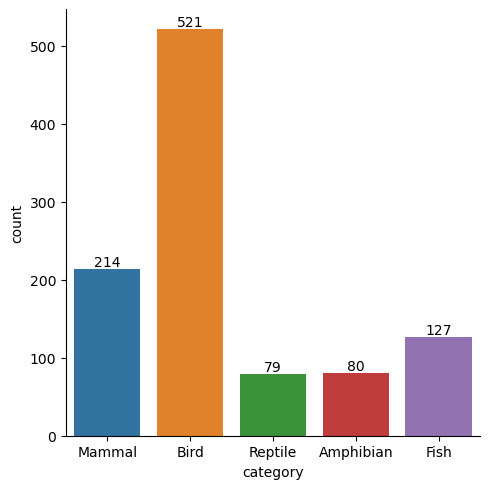

In [34]:
ax = sns.catplot(data=species_animals, x='category', kind='count')
ax = ax.facet_axis(0,0)
for i in ax.containers:
    ax.bar_label(i,)

#### 4.1 Handling missing data

As seen before, most entries in the conservation status columns (about 97%) have missing data. For 5633 records, there are 191 species with information about its conservation status in the dataset.

For the purpose of this topic, it's important to assess the distribution of missing data among animals category.


In [35]:
# Visualizing the distribution of missing conservation status data
species_animal_null = species_animals.fillna(value='No data')
species_animal_null.head(10)

plt.figure(figsize=(10,7))
ax = sns.catplot(data=species_animal_null, x='conservation_status', kind='count', \
                 order=['Species of Concern','Threatened', 'Endangered', 'In Recovery', "No data"])
ax = ax.facet_axis(0,0)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_axis_labels()
ax.set_xticklabels(rotation=45)
plt.title("Distribution of conservation status for animal with null values")
plt.show()
plt.clf()

AttributeError: 'AxesSubplot' object has no attribute 'set_axis_labels'

In [ ]:
sns.catplot(data=species_animal_null, x='conservation_status', col='category', col_wrap = 2,\
            kind='count', height=3, aspect=13/6, \
            order=['Species of Concern','Threatened', 'Endangered', 'In Recovery', "No data"])
plt.show()
plt.clf()

In [ ]:
# Visualizing the distribution of conservation status

plt.figure(figsize=(10,7))
ax = sns.catplot(data=species_animals, x='conservation_status', kind='count', \
                 order=['Species of Concern','Threatened', 'Endangered', 'In Recovery'])
ax.set_xticklabels(rotation=45)
plt.title("Distribution of conservation status for animals")
plt.show()
plt.clf()

In [ ]:
animals = sns.catplot(data=species_animals, x='conservation_status', col='category', col_wrap = 2,\
                      kind='count', order=['Species of Concern','Threatened', 'Endangered', 'In Recovery'],\
                      height=3, aspect=13/6)
plt.show()
plt.clf()


#### Some findings

Most animals were listed as *species of concern* conservation status.



## Which species were spotted the most at each park?

## Selecting species with conservation status data

In [ ]:
# merging

conservation = species.merge(observations, on='scientific_name')
conservation.head()
conservation.info()
print(conservation.duplicated(subset=['scientific_name']).value_counts())
conservation['conservation_status'].isna().value_counts()

In [ ]:
conservation1 = conservation[conservation['conservation_status'].notnull()]

In [ ]:
conservation1.info()

In [ ]:
conservation1.duplicated(subset=['scientific_name']).value_counts()

In [ ]:
conservation1.head(10)

In [ ]:
conservation1.groupby('scientific_name').sum('observations')

- What is the distribution of `conservation_status` for animals?

- Are the differences between species and their conservation status significant?

- Are certain types of species more likely to be endangered?